In [1]:
import pandas as pd
import numpy as np
# Charger le fichier
df = pd.read_csv("/home/jean-paul/Images/age_vs_weight_vs_height_vs_gender.csv")

# Aperçu des données
print(df.head())
print(df.info())


  sex  age  height  weight  sort
0   f  147    59.5   101.0    14
1   m  160    59.3    78.5    93
2   f  148    59.0    95.0    61
3   m  149    57.0    92.0    63
4   m  156    61.5   108.5    28
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     237 non-null    object 
 1   age     237 non-null    int64  
 2   height  237 non-null    float64
 3   weight  237 non-null    float64
 4   sort    237 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 9.4+ KB
None


✅ Étape 2 : Nettoyage des données

On va s'assurer que les colonnes Age, Height, et Weight sont bien numériques et qu’il n’y a pas de valeurs manquantes :

In [3]:
# Vérification des valeurs manquantes
print(df.isnull().sum())

# Conversion des colonnes numériques
df[['age', 'height', 'weight']] = df[['age', 'height', 'weight']].apply(pd.to_numeric, errors='coerce')

# Suppression des lignes avec valeurs manquantes
df.dropna(subset=['age', 'height', 'weight'], inplace=True)


sex       0
age       0
height    0
weight    0
sort      0
dtype: int64


In [4]:
print(df.columns)


Index(['sex', 'age', 'height', 'weight', 'sort'], dtype='object')


✅ Étape 3 : Régression linéaire multiple

On entraîne un modèle pour prédire le poids :

In [6]:
from sklearn.linear_model import LinearRegression

# Variables prédictrices (X) et cible (y)
X = df[['age', 'height']]
y = df['weight']

# Créer et entraîner le modèle
model = LinearRegression()
model.fit(X, y)

# Afficher les coefficients
print("Intercept :", model.intercept_)
print("Coefficients :", dict(zip(X.columns, model.coef_)))


Intercept : -127.81990744476937
Coefficients : {'age': 0.24027491426446054, 'height': 3.0900480393528555}


✅ Étape 4 : Évaluation et prédictions

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Prédictions
y_pred = model.predict(X)

# Évaluation
print("MSE :", mean_squared_error(y, y_pred))
print("R² :", r2_score(y, y_pred))


MSE : 139.07493883410712
R² : 0.6304599519436184


✅ Étape 5 : Visualisation (optionnelle)

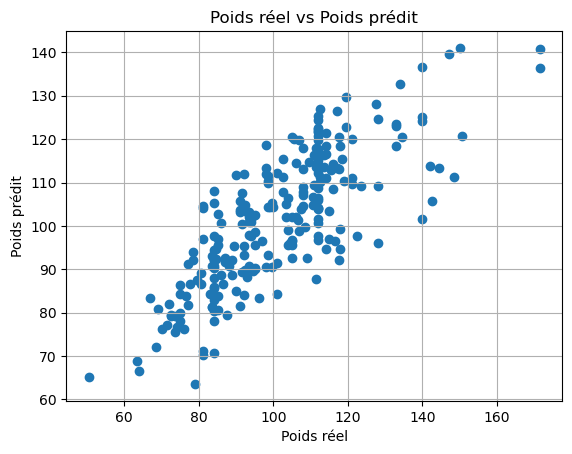

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y, y_pred)
plt.xlabel("Poids réel")
plt.ylabel("Poids prédit")
plt.title("Poids réel vs Poids prédit")
plt.grid()
plt.show()



📌 Étapes du modèle de régression linéaire

    Importer les bibliothèques nécessaires

    Préparer les données (X = age + height, y = weight)

    Diviser les données en train/test

    Créer et entraîner le modèle

    Évaluer le modèle

    Visualiser les résultats (facultatif)

In [12]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Charger le dataset
df = pd.read_csv("/home/jean-paul/Images/age_vs_weight_vs_height_vs_gender.csv")

# 2. Préparer les variables
X = df[['age', 'height']]   # Variables prédictives
y = df['weight']            # Variable cible

# 3. Diviser en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Créer le modèle et l’entraîner
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Faire des prédictions
y_pred = model.predict(X_test)

# 6. Évaluer le modèle
print("📈 Coefficients :", model.coef_)
print("📊 Intercept :", model.intercept_)
print("✅ Score R² :", r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("❌ Erreur quadratique moyenne (RMSE) :", rmse)


📈 Coefficients : [0.2412214 3.1239047]
📊 Intercept : -130.13464192960254
✅ Score R² : 0.46840359695170786
❌ Erreur quadratique moyenne (RMSE) : 13.462034842382698


 Objectif : Visualiser la relation entre les valeurs prédites et réelles du poids

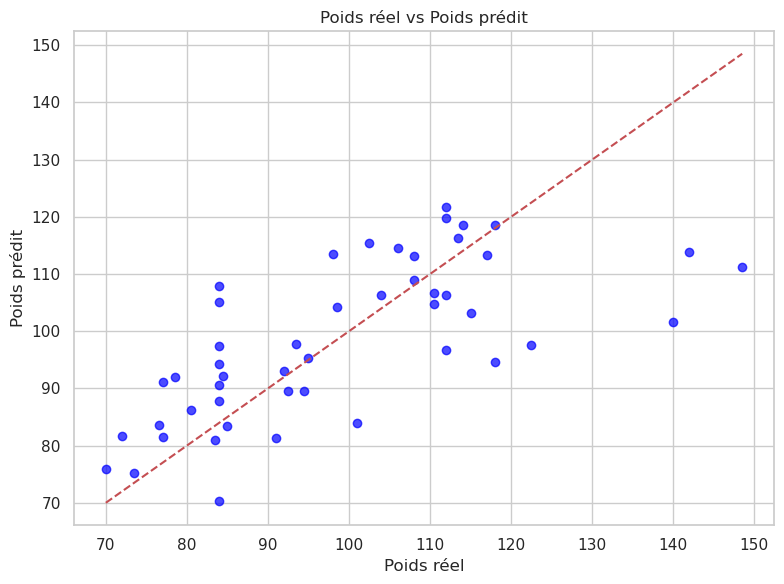

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style de seaborn
sns.set(style="whitegrid")

# Créer une figure
plt.figure(figsize=(8, 6))

# Scatter plot des poids réels vs prédit
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ligne diagonale idéale
plt.xlabel("Poids réel")
plt.ylabel("Poids prédit")
plt.title("Poids réel vs Poids prédit")
plt.grid(True)
plt.tight_layout()
plt.show()


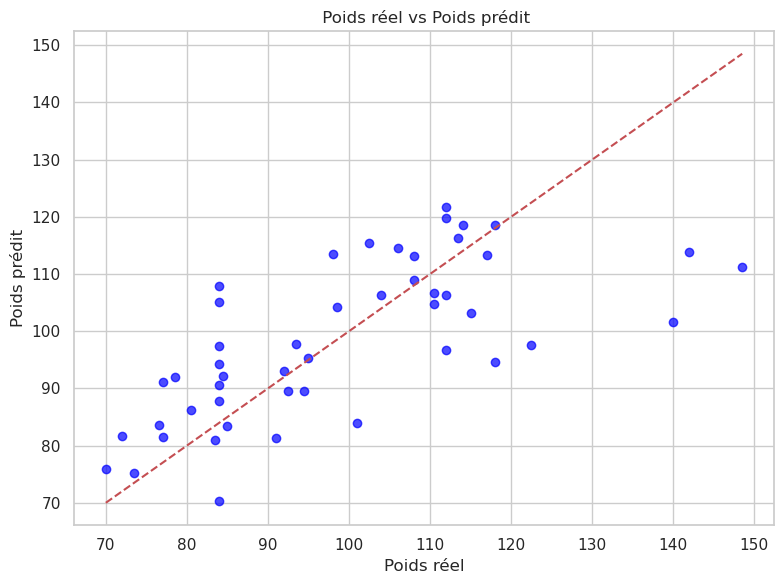

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style de seaborn
sns.set(style="whitegrid")

# Créer une figure
plt.figure(figsize=(8, 6))

# Scatter plot des poids réels vs prédit
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ligne diagonale idéale
plt.xlabel("Poids réel")
plt.ylabel("Poids prédit")
plt.title(" Poids réel vs Poids prédit")
plt.grid(True)
plt.tight_layout()
plt.show()


# Analyse des résultats du modèle de régression linéaire

## Résultats obtenus

- **Coefficients :** `[0.241, 3.124]`  
- **Intercept :** `-130.13`  
- **Score R² :** `0.47` (46.8%)  
- **Erreur quadratique moyenne (RMSE) :** `13.46`  

---

## Interprétation

- **Coefficients :**  
  - Pour chaque augmentation d’1 an d’**âge**, le poids augmente en moyenne de **0.24 kg**, toutes choses égales par ailleurs.  
  - Pour chaque augmentation d’1 cm de **taille**, le poids augmente en moyenne de **3.12 kg**, toutes choses égales par ailleurs.  
  La taille a donc un impact beaucoup plus important sur le poids que l’âge.

- **Intercept :**  
  La valeur théorique du poids quand l’âge et la taille sont nuls (valeur de référence pour la droite de régression), ici `-130.13`, n’a pas de sens pratique mais est nécessaire au calcul.

- **Score R² :**  
  Le modèle explique environ **47%** de la variance totale du poids. Cela indique que plus de la moitié de la variabilité du poids n’est pas expliquée par ce modèle simple.

- **Erreur quadratique moyenne (RMSE) :**  
  L’erreur moyenne entre les poids réels et prédits est d’environ **13.5 kg**, ce qui est relativement élevé et indique des prédictions imparfaites.

---

## Conclusion

Le modèle de régression linéaire montre que la **taille est le facteur prédictif le plus influent** sur le poids des enfants, bien plus que l’âge. Toutefois, avec un **R² modéré (0.47)** et un **RMSE élevé (13.5 kg)**, ce modèle n’explique pas entièrement la variation du poids.  

Cela suggère que d’autres facteurs non pris en compte (par exemple, la nutrition, la génétique, l’activité physique) influencent aussi le poids. Pour améliorer la précision, il serait pertinent d’**ajouter d’autres variables**, d’essayer des **modèles plus complexes** ou d’appliquer des **transformations sur les données**.  

En résumé, ce modèle fournit une première estimation utile mais limitée du poids à partir de la taille et de l’âge.
